In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models  # Pastikan layers diimpor dari tensorflow.keras
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Path ke folder dataset kamu
dataset_dir = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\PlantVillage'

# Ukuran batch dan gambar
batch_size = 16
img_size = (128, 128)

# --- 1. Load data dan buat dataset (tanpa split) ---
full_dataset = image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',  # Label menggunakan integer
    shuffle=True,  # Pastikan data diacak
)

# Ambil data dan label dari dataset
data, labels = [], []
for image_batch, label_batch in full_dataset:
    data.append(image_batch.numpy())
    labels.append(label_batch.numpy())

# Gabungkan data dan label
data = np.concatenate(data)
labels = np.concatenate(labels)

# --- 2. Split data menjadi training, validation, dan testing ---
# Pisahkan data menjadi 80% training dan 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=123)

# Pisahkan sisa 20% menjadi 10% untuk validation dan 10% untuk testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# --- 3. Konversi kembali ke dalam format tf.data.Dataset ---
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# --- 4. Arsitektur Model CNN ---
input_shape = (128, 128, 3)
num_classes = 3  # 3 kelas: Early_blight, Healthy, Late_blight

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 5. Training model ---
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

# --- 6. Evaluasi model dengan data testing ---
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test accuracy: {test_accuracy:.2f}")
print(f"Test loss: {test_loss:.2f}")


Found 2152 files belonging to 3 classes.
Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.5590 - loss: 46.5988 - val_accuracy: 0.6791 - val_loss: 1.0883
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.7458 - loss: 0.6656 - val_accuracy: 0.7302 - val_loss: 0.7101
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.7941 - loss: 0.5496 - val_accuracy: 0.5070 - val_loss: 4.5323
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.8091 - loss: 0.6037 - val_accuracy: 0.7767 - val_loss: 0.5846
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.8470 - loss: 0.4151 - val_accuracy: 0.8093 - val_loss: 0.5487
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.8946 - loss: 0.2888 - val_accuracy: 0.8186 - val_loss: 0.7648
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.9312 - loss: 0.2075 - val_accuracy: 0.7953 - val_loss: 0.9114
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s

In [35]:
print(f"Jumlah data Training: {X_train.shape[0]}")
print(f"Jumlah data Validation: {X_val.shape[0]}")
print(f"Jumlah data Testing: {X_test.shape[0]}")

Jumlah data Training: 1721
Jumlah data Validation: 215
Jumlah data Testing: 216


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


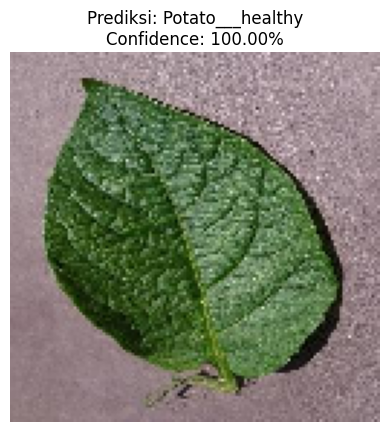

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Ambil class_names dari dataset training
class_names = full_dataset.class_names  # Ambil nama kelas dari dataset training

# Fungsi untuk memprediksi gambar baru dan menampilkan hasil prediksi
def predict_image_with_display(image_path, model, img_size=(128, 128)):
    # Memuat gambar dan mengubah ukurannya sesuai dengan model input
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)  # Mengubah gambar menjadi array
    img_array = tf.expand_dims(img_array, 0)  # Menambahkan batch dimension

    # Melakukan prediksi dengan model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Mengambil kelas dengan probabilitas tertinggi
    confidence = np.max(predictions[0])  # Mengambil nilai probabilitas tertinggi

    # Menampilkan gambar dan hasil prediksi
    plt.imshow(img)  # Menampilkan gambar
    plt.axis('off')  # Menyembunyikan axis
    plt.title(f"Prediksi: {class_names[predicted_class]}\nConfidence: {confidence*100:.2f}%")
    plt.show()

    return predicted_class, confidence

# Contoh jalankan prediksi dengan menampilkan gambar
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\healthy2.jpg'  # Ganti dengan path file gambar baru

predicted_index, confidence = predict_image_with_display(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


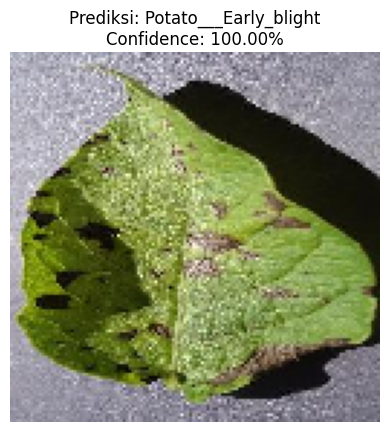

In [45]:
# Contoh jalankan prediksi dengan menampilkan gambar
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\Potato_Early_blight.jpg'  # Ganti dengan path file gambar baru

predicted_index, confidence = predict_image_with_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


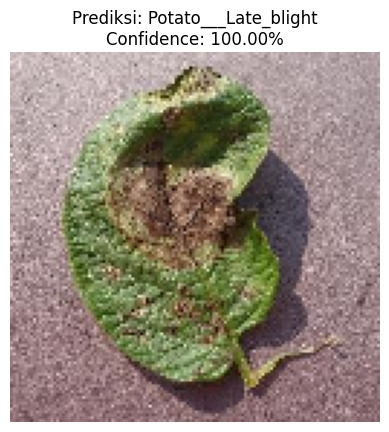

In [40]:
# Contoh jalankan prediksi dengan menampilkan gambar
image_path = 'D:\\Semester 6\\AI\\Artificial_Inteligence\\new_images\\Late_blight2.jpg'  # Ganti dengan path file gambar baru

predicted_index, confidence = predict_image_with_display(image_path, model)